# Lab: Poverty and Inequality

The idea of measuring Poverty and Inequality using the case study on "The Statistics of Poverty and Inequality" [@rouncefield_statistics_1995]. The questions that Mary Rouncefield asked her students were the following:

1. Is the world's wealth distributed evenly?
    What countries are outliers?
2. Do people living in different countries have similar life expectancies?
3. Do men and women have similar life expectancies?
    What is the average difference?
    What is the minimum difference?
    What is the maximum difference?
    In which countries do these occur?
    What are possible explanations for these differences?
4. Are birth rates related to death rates?
5. How quickly are populations growing?

By looking into 6 variables, you can investigate some major inequalites across the globe.  

## Source

In this lab, we will be using [World Development Indicators dataset](https://databank.worldbank.org/source/world-development-indicators#) from the World Bank, which contains the following features: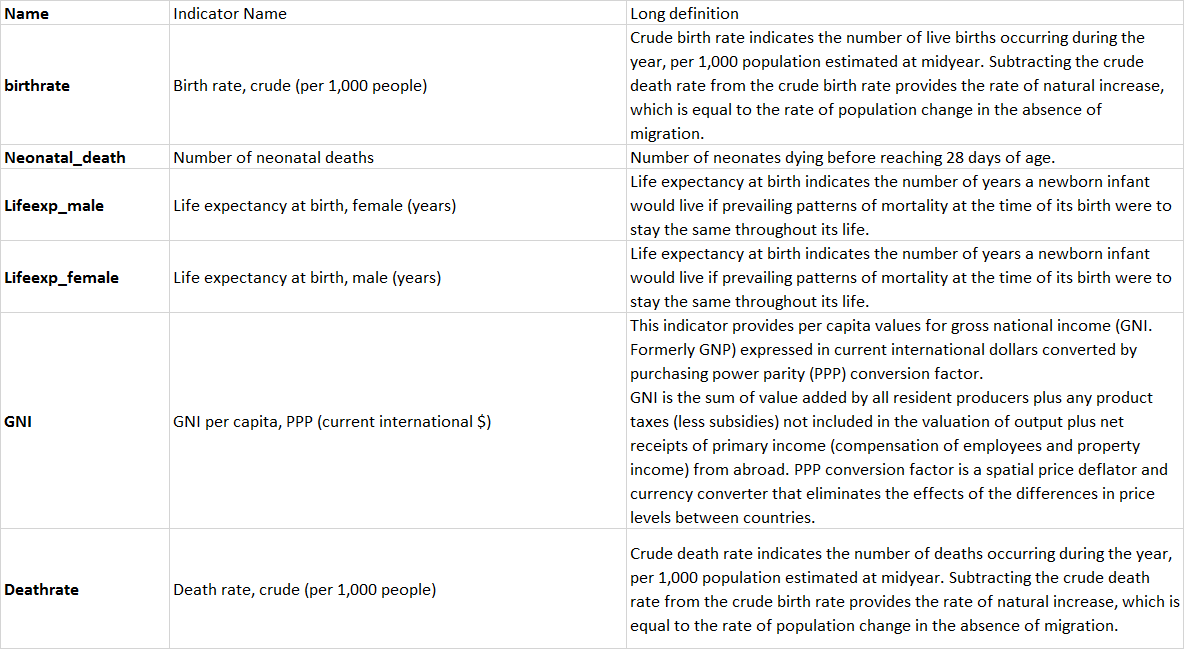



## Reading the dataset


In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('data/WDI_countries_v2.xlsx', sheet_name='Data4')

Let's have a look at our dataset

In [ ]:
df.head()

### Missing values
Let's check if we have any missing data

In [ ]:
df.info()
df.isna().sum()

Looks like there are null values in all but one column (Country Code)

In [ ]:
# Let's look at the distribution of values in the birthrate and deathrate columns
df.boxplot(column=['birthrate', 'Deathrate'])

In [ ]:
# Let's look at the distribution of values in terms of male and female life expectancy
df.boxplot(column=['Lifeexp_female', 'Lifeexp_male'])

In [ ]:
# Let's look at the distribution of the Gross National Income (surely we expect to see outliers!)
df.boxplot(column=['GNI'])

In [ ]:
# So, as expected, the world's wealth is not distributed evenly, but what countries are the outliers as Mary Rouncefield asked?
# We don't have the geographic coordinates as with our Hate Crime dataset to project on a map
# But perhaps we can think of other ways to get this information. Following is one way of doing this. 

# Get the 25th and 75th percentile GNI values
GNI_quartiles = df['GNI'].describe()[['25%', '75%']]

# Calculate the IQR
IQR_GNI = GNI_quartiles['75%'] - GNI_quartiles['25%']

# Calculate the whiskers
lb_GNI = GNI_quartiles['25%'] - 1.5 * IQR_GNI
ub_GNI = GNI_quartiles['75%'] + 1.5 * IQR_GNI

# Retrieve the outliers
outliers_GNI_df = df[(df['GNI'] < lb_GNI) | (df['GNI'] > ub_GNI)]

# Get Country Codes for the outliers
outliers_GNI_countries = outliers_GNI_df['Country Code']
outliers_GNI_countries

Perhaps you can checkout this link if you are doubtful about the [country names and codes](https://wits.worldbank.org/wits/wits/witshelp/content/codes/country_codes.htm)

In [ ]:
# As with Part 1, let's standardise our data before we attempt further modelling using the data
from sklearn import preprocessing
import numpy as np
import seaborn as sns

# Get column names first
df_stand = df[['birthrate', 'Deathrate', 'GNI', 'Lifeexp_female', 'Lifeexp_male', 'Neonatal_death']]
names = df_stand.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit our data on the scaler object
df2 = scaler.fit_transform(df_stand)

# Check what type is df2? (Do you recollect this from Part 1?)
type(df2)

In [ ]:
# Let's convert the numpy array into a DataFrame before further processing
df2 = pd.DataFrame(df2, columns=names)
df2.tail()

In [ ]:
# Now that our data has been standardised, let's look at the distribution across all columns
ax = sns.boxplot(data=df2, orient="h")

In [ ]:
# There are clearly several outliers in some columns. Let's take a look at the numbers
df.describe()

In [ ]:
# Let's look at the histogram for birthrate 
df[['birthrate']].plot(kind='hist', ec='black')

Tip for reflection: Is the above a unimodal or bimodal distribution? Positive or negative skew - We have worked on this in earlier labs. Try to recollect/revisit and reflect. Can we see/say any better with a kernel density plot?

In [ ]:
# Let's create a pairwise plot as we have done many times before to get an idea about the relationship between variables  
sns.pairplot(data = df.iloc[:,1:])

Hmmm, some likely positive and negative correlations

In [ ]:
# Let's check the relationship between birthrate and deathrate
df.plot(x = 'birthrate', y = 'Deathrate', kind='scatter')

In [ ]:
# Let's create a heatmap like we did in Part 1
corrMatrix = df.corr(numeric_only=True).round(1) # Again, round(1) so that it's easier to read given number of variables
sns.heatmap(corrMatrix, annot=True)
plt.show()

## How quickly are populations growing?

This question can be investigated by calculating birth rate minus death rate. 

In [ ]:
# Let's add a new column to our DataFrame to indicate the rate of population change (assuming the absence of migration)
df['pop_change_rate'] = df['birthrate'] - df['Deathrate']
df.head()

In [ ]:
# Let's look at the distribution of our new rate of population change column 
df.boxplot(column=['pop_change_rate'])

Let's investigate the values in the column more deeply:

In [ ]:
pop_change_rate_summary = df['pop_change_rate'].describe()
pop_change_rate_summary

The results range from -6.5 (a decreasing population) to +37.811 (an increasing population). The mean is around 12.06. What does this signify?